# Spam Classification Lab
_Georgetown Certificate in Data Science_
_Module 1: Foundations of Data Science_

## Lab Overview

This lab will go through the steps of the data science pipeline that we covered in class. In class, we talked about building a classification model that could distinguish between `relevant` and `not relevant` news articles. This lab will be similar, although not exactly the same: we'll build a **spam classifier**.

### The Task, and the Data
- We'll use a training dataset from the UC Irvine Machine Learning repository, which is a great resource for learning. The dataset consists of a few thousand text messages, some of which are spam. Our objective is to train a machine learning model capable of distinguishing between `spam` and `not spam` (referred to as `ham`).
- You can find the dataset [here](https://archive.ics.uci.edu/dataset/94/spambase).
- We'll finish up the lab by building a lightweight web application that you can use to see what kinds of predictions our model makes with any text message you can think of! This part is optional, and it's okay if the code doesn't all make sense -- but it's a good exercise in understanding how we might consider making our machine learning models useful after we've put so much work into them.

### Data Science Pipeline

As a reminder, the steps in our data science pipeline are:

1. **Data Ingestion**: The initial step in which we acquire our data, typically by downloading it, using APIs, or from some data repository.
2. **Munging and Wrangling**: Preprocessing of data where we handle missing values, outliers, and structure it in a way that makes it suitable for analysis. This may also include storing the data in databases.
3. **Computation and Analysis (EDA)**: We explore our data using statistics and visual tools to understand its characteristics, distribution, and relationships.
4. **Modeling and Application**: We apply algorithms to build predictive or classification models, and then we evaluate these models to check their performance.
5. **Reporting and Visualization**: Finally, we communicate our findings, whether that's via reports, visuals, dashboards, or other applications. This is where we translate our technical findings into actionable business insights.

Perhaps unsurprisingly, that's also the flow of this lab. Let's get started!

### Student Tasks
The sections of that lab for you to complete are marked with this header:
> ### 📌 Task: _____

Under each Task, there's an empty code block with instructions and space for you to complete the task. Good luck, and have fun!


## 0. Import relevant Python libraries

In [1]:
import pandas as pd
import pickle

# Visualization libraries
import matplotlib.pyplot as plt
import plotly.express as px

# Machine learning models
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Machine learning utilities
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, classification_report
from yellowbrick.classifier import ClassificationReport
from sklearn.preprocessing import LabelEncoder
from yellowbrick.classifier import ConfusionMatrix
from sklearn.pipeline import Pipeline

## 1. Data Ingestion
We'll download the data and open it in Pandas. We can either download a file that we store on our computer's disk, or we can use the URL where the file is hosted and download it straight into a Pandas dataframe.

In [2]:
# Let's download the data directly from where the data is hosted
# Pandas has a utility to download files directly from the internet,
# which is cool. Notice that it's a tab-delimited file -- the
# extension ends in ".tsv". So we just let Pandas know that by using the
# "delimiter" argument.

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv"
df = pd.read_csv(url, delimiter='\t', header=None, names=['label', 'message'])

# Let's peek at our data
df.head()

# Alternatively, you could download the file from the internet:
# https://archive.ics.uci.edu/dataset/228/sms+spam+collection
# Then you could and save the file locally and read it using code like this:

# spam_path = "data/SMSSpamCollection" # I saved it in a directory called "data"
# df = pd.read_csv(spam_path, header=None, delimiter="\t", names=["label", "message"])

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# 2. Munging and Wrangling

For this lab, the dataset is quite clean. But let's start by understanding the distribution of our labels.

In [3]:
# Show the distribution of labels
label_dist = df['label'].value_counts()
label_dist

,count
label,
ham,4825
spam,747


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

label      0
message    0
dtype: int64


In [ ]:
# How we might remove rows with missing values:
# df.dropna(inplace=True)

In [ ]:
# Filling missing textual data with a placeholder text
# sms_data['text'].fillna('missing', inplace=True)

### 📌 Task: Munging and Wrangling - Deduplicating Data
In any dataset, duplicated rows can skew analysis and predictions. It's crucial to ensure data is clean and deduplicated. In this task, you will remove any duplicated rows from your dataframe.

Objective: Identify and remove any duplicate rows from the df dataframe.
Steps:
1. Identify the number of duplicate rows.
2. Remove the duplicates.
3. Verify that duplicates have been removed.

There are multiple ways to accomplish this task; you just need to find one that works!
_Hint: Pandas documentation is a great place to find the answer._

In [5]:
# STEP 1: Identify the number of duplicate rows
# TODO: Your code here to identify duplicates
# Count the number of duplicate rows
print("Step 1 outcome")
print("--------------")
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")
print()

# STEP 2: Remove the duplicates
# TODO: Your code here to remove duplicates
# Remove duplicate rows and print unique row count
print("Step 2 outcome")
print("--------------")
no_duplicates = df.drop_duplicates()
print("Number of unique rows: ", no_duplicates.count())
print()

# STEP 3: Verify that duplicates have been removed
# TODO: Your code here to verify removal
# Verify that duplicates have been removed
print("Step 3 outcome")
print("--------------")
check_duplidate = no_duplicates.duplicated().sum()
print(f"Number of duplicate rows after removal: {check_duplidate}")

Step 1 outcome
--------------
Number of duplicate rows: 403

Step 2 outcome
--------------
Number of unique rows:  label      5169
message    5169
dtype: int64

Step 3 outcome
--------------
Number of duplicate rows after removal: 0


### Investigating Data Quality Issues
Besides missingness, there might be other data quality issues to consider, such as:

- Inconsistent text data: Especially in textual datasets, it might be common to find different forms of the same word (e.g., U.S.A. vs. USA).
- Outliers: While more relevant for numerical data, in textual data, a message with a very large number of characters might be a system error or spam.
- Unbalanced classes: In our context, we might have far more 'ham' messages than 'spam', which might impact the performance of our machine learning models.

This section provides a basic overview of checking for data quality issues. In practice, this process might be more iterative and might require more domain-specific considerations.

## 3. Computation and Analysis
Let's visualize the distribution of message lengths and the breakdown of labels.

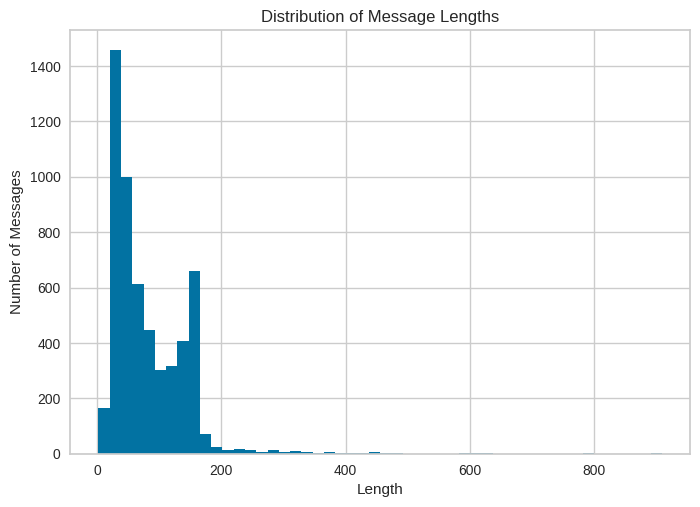

In [12]:
# Distribution of message lengths
df['text_length'] = df['message'].apply(len)
df['text_length'].hist(bins=50)
plt.title('Distribution of Message Lengths')
plt.xlabel('Length')
plt.ylabel('Number of Messages')
plt.show()

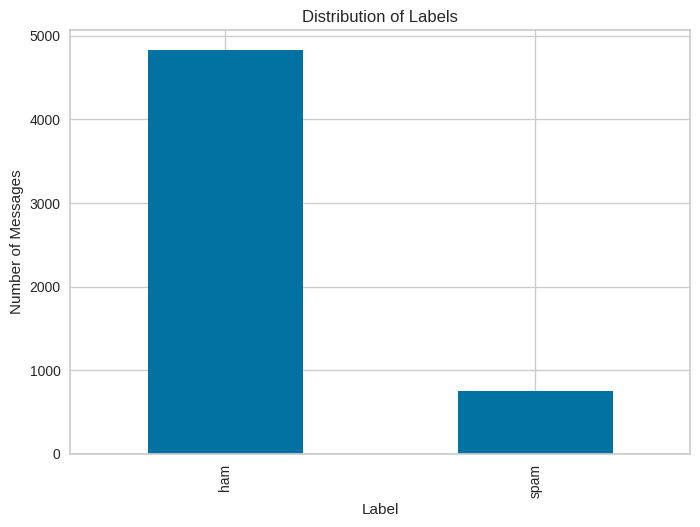

In [ ]:
# Breakdown of "spam" vs "ham" labels
label_dist.plot(kind='bar')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Number of Messages')
plt.show()

### Trying a different visualiation library: Plotly

Matplotlib is a great library, but there are very, very many visualization options. Here's a look at the library Plotly. Note that you interact with this library in a slightly different way, and there are generally fewer lines of code involved. The visualizations are also interactive, and they're rendered as HTML: if you hover over a data point, you can see information in a "tooltip". The documentation goes into much more detail, if you're interested: https://plotly.com/python/.

In [13]:
# Histogram using Plotly
fig_length = px.histogram(df, x='text_length', title='Distribution of Message Lengths', nbins=50)
fig_length.show()

In [14]:
# Box plot using Plotly
fig_box = px.box(df, x='label', y='text_length', points="all", title="Message Length by Label")
fig_box.show()

### 📌 Task: Create Another Visualization of Your Data or Model
Data visualization provides insights that might not be immediately apparent from raw data. Create another visualization of your choice that you find insightful.

Objective: Explore your data or model outcomes with a new visualization.

Steps:
1. Choose a type of plot or chart that you find interesting.
2. Implement the visualization using matplotlib or plotly.
3. Interpret your visualization briefly.
_Hint: matplotlib and plotly documentation offer many examples._

In [16]:
# STEP 1: Choose a visualization type (e.g. scatter plot, histogram, etc.)

# Histogram using Plotly
fig_length = px.histogram(df, x='text_length', title='Distribution of Message Lengths', nbins=50)
fig_length.show()

# Box plot using Plotly
fig_box = px.box(df, x='label', y='text_length', points="all", title="Message Length by Label")
fig_box.show()

# Plotly Pie
fig = px.pie(df, names="label", color="label")
fig.show()


# STEP 2: Implement the visualization
# Example: plt.hist(df['column_name'])
# TODO: Your code here

# STEP 3: Interpretation
# TODO: Write down your insights below this cell after creating the visualization


### Data Transformation
Once we're satisfied with the cleanliness and quality of your data, it might be necessary to transform it to better suit your analysis or modeling needs.

For our dataset:

In [17]:
# We'll need to convert labels to numerical values (e.g., 'ham' to 0 and 'spam' to 1)
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# Checking the first few rows to see our changes
df.head()

,label,message,text_length,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0


## 4. Modeling and Application

We'll try two approaches to the actual machine learning portion of this lab:
1. A **"steel thread"**. The "steel thread" approach is extremely basic: it involves minimal feature engineering, no hyperparameter tuning -- but it results in a model that is capable of making predictions. The idea is that regardless of how good or not-yet-good our model is, as long as it's complete and working, we can have a fully functional data science pipeline that spans from ingestion to reporting.
2. A refined pass at improving our modeling. This builds on the steel thread, incrementally improving it. We might use better feature engineering (perhaps with a method like TF-IDF) and attempt a pass at hyperparameter tuning

### Simple Steel Thread
No-frills, straightforward, probably-not-exceptionally-impressive. This stage involves creating a minimal pipeline for transforming our data into something a model can understand, then using the formatted data to train a model.

In [18]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

In [20]:
# Using CountVectorizer to transform our text data
vectorizer = CountVectorizer(stop_words='english')
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Train a Naive Bayes model
clf = MultinomialNB()

In [21]:
# This one line of code is where the machine learning happens
clf.fit(X_train_transformed, y_train)

MultinomialNB()

In [ ]:
# Making predictions
y_pred = clf.predict(X_test_transformed)

# Evaluating our model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.97      0.95      0.96       149

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



### Slightly more refined pass

Let's try again with a couple of different models, and let's compare them. We'll also evaluate which model performs the best, using F1 as our metric.


In [22]:
# Using TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
X_train_transformed_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_transformed_tfidf = vectorizer_tfidf.transform(X_test)

# Comparing different models: Naive Bayes, Random Forest, and Logistic Regression
models = [
    ('Naive Bayes', MultinomialNB()),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42))
]

best_f1 = 0
best_model_name = ''
best_model = None

for name, model in models:
    model.fit(X_train_transformed_tfidf, y_train)
    y_pred = model.predict(X_test_transformed_tfidf)

    # Display results
    print(f"Results for {name}")

    # Output formatted for printing
    print(classification_report(y_test, y_pred, output_dict=False))
    print("------------------------------")

    # Determine if this model has the highest F1 score
    report = classification_report(y_test, y_pred, output_dict=True) # output formatted as a dict this time
    f1 = report['weighted avg']['f1-score']
    if f1 > best_f1:
        best_f1 = f1
        best_model_name = name
        best_model = model

# Save the best model to disk using pickle
filename = 'best_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"The best model is {best_model_name} with F1 score of {best_f1:.2f}. Model saved as {filename}.")

# # Also save the vectorizer, which is already fitted to our training data
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer_tfidf, file)

Results for Naive Bayes
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

------------------------------
Results for Random Forest
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       1.00      0.86      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115

------------------------------
Results for Logistic Regression
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.77      0.87       149

    accuracy                          

### 📌 Task: Train Another Classifier
Scikit-learn offers a plethora of algorithms. Research and choose another classifier to train on your data.

Objective: Train a different classifier from the ones used in the lab.

Steps:
1. Research and choose another classifier from scikit-learn.
2. Train the classifier using the training data.
3. Validate its performance with the test data.
_Hint: The scikit-learn documentation has a list of available classifiers._

In [ ]:
from sklearn.linear_model import LogisticRegression  # Replace some_module and YourChosenClassifier appropriately

# STEP 1: Choose another classifier -- something like:
# clf_task = LogisticRegression()
clf_task = DecisionTreeClassifier()
# etc.

# STEP 2: Train the classifier
# TODO: Your code here
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load sample dataset (Iris dataset in this example)
data_task = load_iris()
X, y = data_task.data, data_task.target

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_task = LogisticRegression(max_iter=200)  # Increase max_iter to avoid convergence issues
clf_task.fit(X_train, y_train)  # Train the model

# STEP 3: Validate its performance
# TODO: Your code here
y_pred = clf_task.predict(X_test)  # Predict on test set

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


## 5. Visual Model Diagnostics

Visualization isn't just something we do at the end of a project -- it can help us understand what's happening behind the scenes with our machine learning models. Instead of viewing our classfication reports as tables, let's visualize them using the Yellowbrick library.

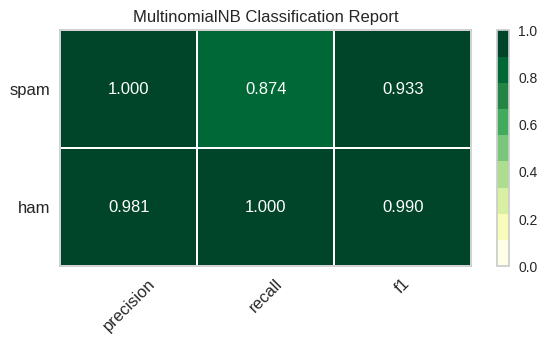

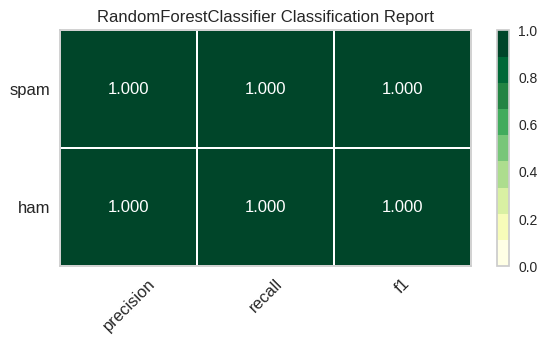

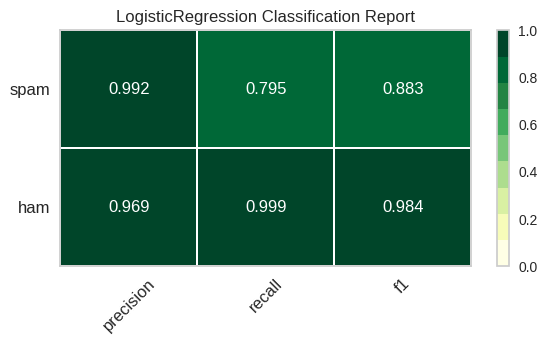

In [ ]:
def visualize_model(X_train, y_train, X_test, y_test, model_name, estimator):
    """
    Visualize performance of an estimator using Yellowbrick's ClassificationReport.
    """
    # Ensure labels are properly encoded
    y_train_encoded = LabelEncoder().fit_transform(y_train)
    y_test_encoded = LabelEncoder().fit_transform(y_test)

    # Create a pipeline with TfidfVectorizer and the estimator
    model = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english')),
        ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, classes=['ham', 'spam'],
        cmap="YlGn", size=(600, 360)
    )

    # ---- Changed Section ----
    # Use the appropriate training and testing data for text classification
    # Assuming df['message'] contains the text messages and df['label_num']
    # contains the numerical labels (0 for ham, 1 for spam)
    X_train_text = df['message']
    X_test_text = df['message']
    y_train_num = df['label_num']
    y_test_num = df['label_num']

    visualizer.fit(X_train_text, y_train_num)  # Fit using text data
    visualizer.score(X_test_text, y_test_num)  # Score using text data
    # ---- End of Changed Section ----

    visualizer.show(title=f"Classification Report for {model_name}")

# Loop over each model and visualize
for name, model in models:
    visualize_model(X_train, y_train, X_test, y_test, name, model)

In [ ]:
def visualize_confusion_matrix(X_train, y_train, X_test, y_test, model_name, estimator):
    """
    Visualize confusion matrix of an estimator using Yellowbrick's ConfusionMatrix.
    """
    # Ensure labels are properly encoded
    #y_train_encoded = LabelEncoder().fit_transform(y_train) # removed as not needed
    #y_test_encoded = LabelEncoder().fit_transform(y_test) # removed as not needed

    # Create a pipeline with TfidfVectorizer and the estimator
    model = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english')), # This might not be needed
        ('estimator', estimator)
    ])

    # Instantiate the confusion matrix visualizer
    visualizer = ConfusionMatrix(
        model, classes=['ham', 'spam'], # if using Iris dataset, this needs to reflect class names
        cmap="YlGn", size=(600, 360)
    )
    # Assuming 'message' column in df contains text data:
    visualizer.fit(df['message'].iloc[X_train.index], y_train)  # Fit using corresponding text messages visual

In [ ]:
# def visualize_confusion_matrix(X_train, y_train, X_test, y_test, model_name, estimator):
#    """
#    Visualize confusion matrix of an estimator using Yellowbrick's ConfusionMatrix.
#    """
    # Ensure labels are properly encoded
 #   y_train_encoded = LabelEncoder().fit_transform(y_train)
 #   y_test_encoded = LabelEncoder().fit_transform(y_test)

    # Create a pipeline with TfidfVectorizer and the estimator
 #   model = Pipeline([
 #       ('tfidf', TfidfVectorizer(stop_words='english')),
 #       ('estimator', estimator)
 #   ])

    # Instantiate the confusion matrix visualizer
 #   visualizer = ConfusionMatrix(
 #       model, classes=['ham', 'spam'],
 #       cmap="YlGn", size=(600, 360)
 #   )
 #   visualizer.fit(X_train, y_train_encoded)
 #   visualizer.score(X_test, y_test_encoded)
 #   visualizer.show(title=f"Confusion Matrix for {model_name}")

# Loop over each model and visualize the confusion matrix
# for name, model in models:
#    visualize_confusion_matrix(X_train, y_train, X_test, y_test, name, model)


### 📌 Task: Generate Confusion Matrix for Your Classifier
A confusion matrix provides a summary of the prediction results for a classification problem.

Objective: Generate a confusion matrix for the classifier you trained.

Steps:
1. Predict the class labels for the test set.
2. Generate the confusion matrix.

_Hint: we just did this earlier -- you can use the same syntax._

In [ ]:
# STEP 1: Predict class labels for the test set;
# you'll use these as inputs for the confusion matrix
# TODO: Your code here
y_pred = clf_task.predict(X_test)

# STEP 2: Generate the confusion matrix.
# Use the function visualize_confusion_matrix(), provided above.
# TODO: Your code here

def visualize_confusion_matrix(X_train, y_train, X_test, y_test, model_name, estimator):
    """
    Visualize confusion matrix of an estimator using Yellowbrick's ConfusionMatrix.
    """
    # Ensure labels are properly encoded
    #y_train_encoded = LabelEncoder().fit_transform(y_train) # removed as not needed
    #y_test_encoded = LabelEncoder().fit_transform(y_test) # removed as not needed

    # Create a pipeline with TfidfVectorizer and the estimator
    model = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english')), # This might not be needed
        ('estimator', estimator)
    ])

    # Instantiate the confusion matrix visualizer
    visualizer = ConfusionMatrix(
        model, classes=['ham', 'spam'], # if using Iris dataset, this needs to reflect class names
        cmap="YlGn", size=(600, 360)
    )
    # Assuming 'message' column in df contains text data and X_train is a range of indices:
    visualizer.fit(df['message'][X_train.index[0]:X_train.index[-1]], y_train)  # Fit using corresponding text messages visual

## 6. Reporting and Visualization

We're going to use a library called Streamlit to write an extremely basic Python application. We'll use the application to serve our model!

This part of the lab isn't "on the test", so to speak -- the certificate program isn't focused on building web apps. The cell below contains a lot that you may not understand yet -- that's perfectly fine. You don't need to know all of this right now. But if you want to, it's a good idea to try to read the code and follow along with what it's doing. You can also play around with adjusting parts of it and seeing how it changes the application we're building.

### An aside: `%%writefile` syntax
Note that the cell starts with some strange syntax that doens't look like Python: `%%writefile spam_app.py`. This line is actually instructing the Jupyter notebook to creating a new Python file. The two percentage signs are an example of something called "Jupyter magic" -- they're just little tools that help folks who use Jupyter notebooks be more productive or communicate more clearly. In this example, I could have just included a file called `spam_app.py` and instructed you to open it, but doing it this way contains our entire lab to this single notebook.

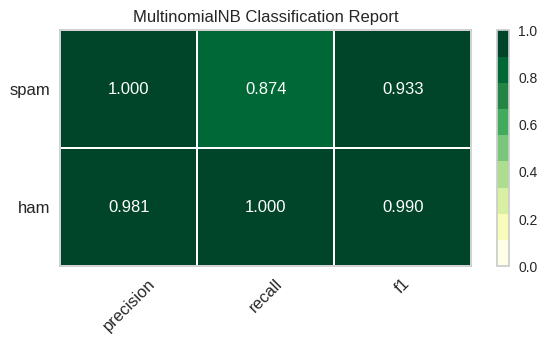

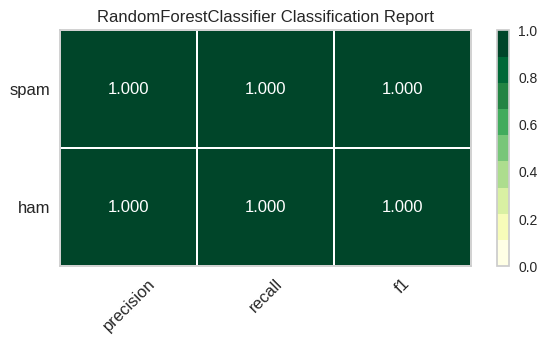

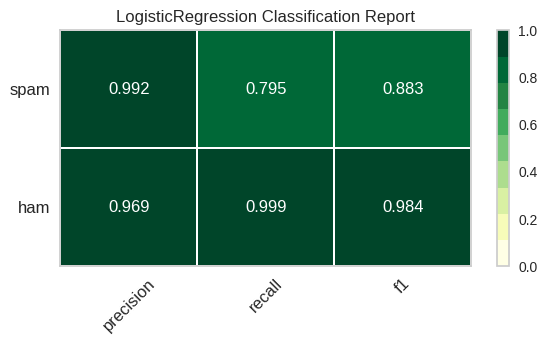

In [ ]:
def visualize_model(X_train, y_train, X_test, y_test, model_name, estimator):
    """
    Visualize performance of an estimator using Yellowbrick's ClassificationReport.
    """
    # Ensure labels are properly encoded
    y_train_encoded = LabelEncoder().fit_transform(y_train)
    y_test_encoded = LabelEncoder().fit_transform(y_test)

    # Create a pipeline with TfidfVectorizer and the estimator
    model = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english')),
        ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, classes=['ham', 'spam'],
        cmap="YlGn", size=(600, 360)
    )

    # ---- Changed Section ----
    # Use the appropriate training and testing data for text classification
    # Assuming df['message'] contains the text messages and df['label_num']
    # contains the numerical labels (0 for ham, 1 for spam)
    X_train_text = df['message']
    X_test_text = df['message']
    y_train_num = df['label_num']
    y_test_num = df['label_num']

    visualizer.fit(X_train_text, y_train_num)  # Fit using text data
    visualizer.score(X_test_text, y_test_num)  # Score using text data
    # ---- End of Changed Section ----

    visualizer.show(title=f"Classification Report for {model_name}")

# Loop over each model and visualize
for name, model in models:
    visualize_model(X_train, y_train, X_test, y_test, name, model)

In [ ]:
%%writefile spam_app.py

import streamlit as st
import pickle
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Load the pickled model and vectorizer
with open('best_model.pkl', 'rb') as file:
    model = pickle.load(file)

with open('tfidf_vectorizer.pkl', 'rb') as file:
    vectorizer = pickle.load(file)

def highlight_important_features(model, vectorizer, text):
    """
    Extract and rank important features (words) from the given text based on the model's feature importances.

    Parameters:
    - model (sklearn.base.BaseEstimator): A trained machine learning model,
                                          currently supporting Logistic Regression and Random Forest.
    - vectorizer (sklearn.feature_extraction.text.TfidfVectorizer): A fitted TF-IDF vectorizer.
    - text (str): The input text from which to extract and rank important words.

    Returns:
    - list[tuple[str, float]]: A list of tuples where each tuple represents a word from the text and its
                               corresponding importance. The list is sorted by importance in descending order,
                               with the most important word first. The importance metric differs based on the model:
                                   - Logistic Regression: Coefficient values.
                                   - Random Forest: Feature importances (mean decrease impurity).
                               Only the top 10 important words are returned.

    Notes:
    - For Logistic Regression, the coefficients represent how a one-unit change in the predictor affects
      the log odds of the response variable being 1.
    - For Random Forest, the importances are computed as the mean decrease impurity, a measure of how much
      a feature contributes to the overall prediction accuracy.
    """
    feature_names = vectorizer.get_feature_names_out()

    # For Logistic Regression
    if isinstance(model, LogisticRegression):
        coefficients = model.coef_[0]
        tokens = vectorizer.transform([text])
        important_words = [(feature_names[index], coefficients[index]) for index in tokens.indices]

    # For Random Forest
    elif isinstance(model, RandomForestClassifier):
        importances = model.feature_importances_
        tokens = vectorizer.transform([text])
        important_words = [(feature_names[index], importances[index]) for index in tokens.indices]

    # For Multinomial Naive Bayes
    elif isinstance(model, MultinomialNB):
        log_probabilities = model.feature_log_prob_
        # For binary classification, class `1` is usually the spam class
        spam_class_index = list(model.classes_).index(1)
        tokens = vectorizer.transform([text])
        important_words = [(feature_names[index], log_probabilities[spam_class_index][index]) for index in tokens.indices]

    else:
        return []

    # Sort words by importance
    important_words = sorted(important_words, key=lambda x: -abs(x[1]))
    return important_words[:10]



# Define the main function for the Streamlit app
def main():
    st.title("Spam Detection App")
    st.write("Enter a sample SMS text message. Our model will predict whether it's spam or ham:")

    # Get user input
    user_input = st.text_area("Message", "")

    # Create a predict button and when it's clicked, predict the class of the input text
    if st.button("Predict"):
        # Transform the user input text using the Tfidf vectorizer
        user_input_transformed = vectorizer.transform([user_input])

        # Use the loaded model to make a prediction
        prediction = model.predict(user_input_transformed)[0]
        prediction_proba = model.predict_proba(user_input_transformed)

        # Display prediction and confidence
        if prediction == "spam":
            st.write(f"The message is predicted to be: **Spam** with a confidence of {prediction_proba[0][1]:.2%}")
        else:
            st.write(f"The message is predicted to be: **Ham** with a confidence of {prediction_proba[0][0]:.2%}")

        # Let's have our app display the words that are most important
        # to our model's predictions. See the highlight_important_features() function
        # above for more details.
        important_words = highlight_important_features(model, vectorizer, user_input)
        if important_words:
            # Convert the list of tuples into a DataFrame
            df_important_words = pd.DataFrame(important_words, columns=["Word", "Importance"])
            # Sort the dataframe by Importance, in descending order to have the most important words at the top
            df_important_words = df_important_words.sort_values(by="Importance", ascending=False)
            st.write("Words contributing to the prediction:")
            # Display the table in Streamlit
            st.table(df_important_words)

# Run the app. These two lines allow our file to be run from the command line
if __name__ == "__main__":
    main()


Overwriting spam_app.py


### Executing our application

The cell below has an exclamation point at the beginning, which is just Jupyter syntax for saying `run this line in my command line interface`. E.g., if you ran `!ls` in a Jupyter cell, the output would list the contents of your current working directory.

In this case, we're simply instructing the program `streamlit` to `run` the file that we created in the previous cell, `spam_app.py`. If everything goes as expected, your browser should open another tab with our lightweight application in it.

Once it's up and running, test out what our model thinks about a few new text messages!

_(Note that the cell will continue to run until you stop it. This case is slightly different from normal Jupyter cells that complete after finishing a task; it's serving up an application for your web browser to render.)_

In [ ]:
!streamlit run spam_app.py

# Iterate and revise

At this point, we've made a pass through the entire pipeline. But, if you remember from class, there's always room to improve!

# Discussion Questions

Congratulations -- in this lab, we've successfully taken a (brief) tour of the entire data science pipeline.

Here are some good questions to consider for class. They won't be formally graded, but you'll get the most out of this exercise if you develop a perspective on each of these questions before we meet synchonously:
1. What is our model good at, in terms of predicting `ham` vs `spam` text messages correctly? What is it less good at?
2. If you had a few days to do nothing else but improve this workflow, where would you prioritize? Why?
3. What would have happened to our model if we had not removed the duplicate rows when cleaning the data?
4. We have a lot more examples of `ham` texts in our training data than `spam`. How might that affect the way our model makes decisions? Is there anything we can do about it?
5. If given more data, particularly for the minority class, how do you think the performance of the model might change?
6. Considering the context of SMS messages and the costs of misclassification: Is it worse to misclassify a ham as spam (false positive) or a spam as ham (false negative)? Why?
7. In what real-world scenarios could such a spam classifier be applied? What would be the potential benefits and drawbacks?
8. Our dataset includes short SMS messages. How might our model's performance be affected if we had to classify longer documents, like emails?
9. How might slang or colloquial language play a role in the model's ability to correctly classify messages?
10. With new slang, memes, and internet language evolving rapidly, how might the model handle these changes over time? How frequently should the model be updated?
11. What ethical concerns could arise from automating spam classification? Consider both the technical and societal implications.

## Closing note
Remember: you don't need to have mastered all of this content yet. Please do not feel overwhelmed. Having said that, this is an excellent example of one of the points we try to make in class: that the primary skill of a data scientist is the ability to learn new skills. So if you're intrigued by how any of this works but don't totally understand it, feel free to go the the source: the documentation! The docs are the best way to learn about a new piece of technology.
- [Jupyter magic documentation](https://ipython.readthedocs.io/en/stable/interactive/magics.html)
- [Scikit-learn documentation](https://scikit-learn.org/stable/getting_started.html)
- [Streamlit documentation](https://docs.streamlit.io/)